### Inferential and descriptive statistics

In [1]:
# inferential statistics -> do the test on 100 and say overall percentage
# descriptive statistics -> do the test for all and say overall percentage

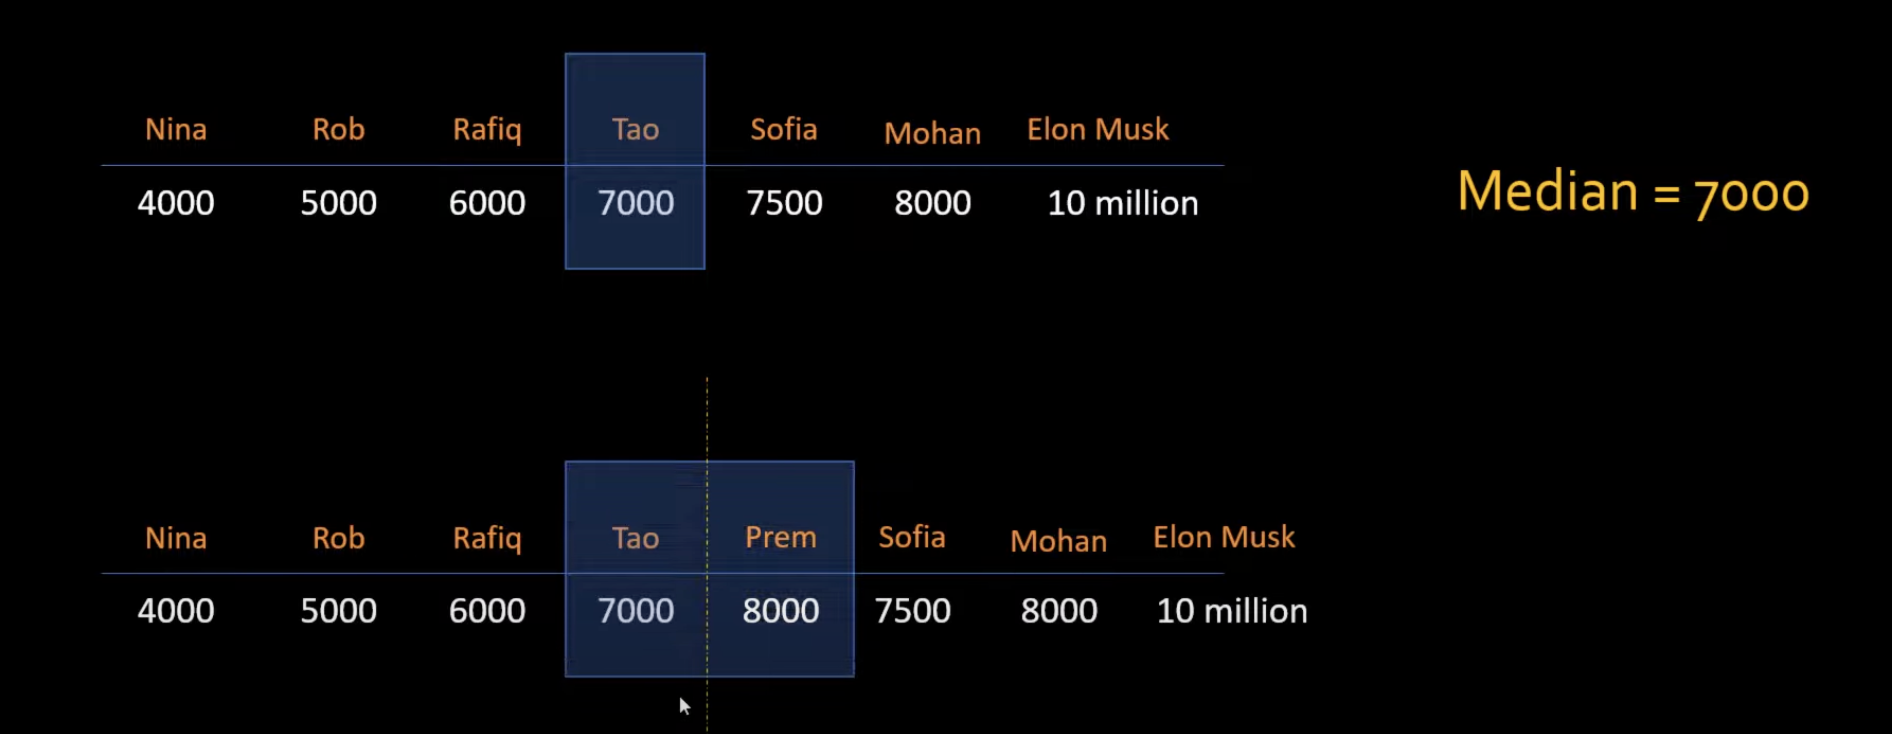

In [2]:
# Average is not giving perfect if we have some unusual number
# median might give good look

#### Handling missing values

In [3]:
# as in previous it isnot good idea to have average better median
# so in here mush is outlier data point

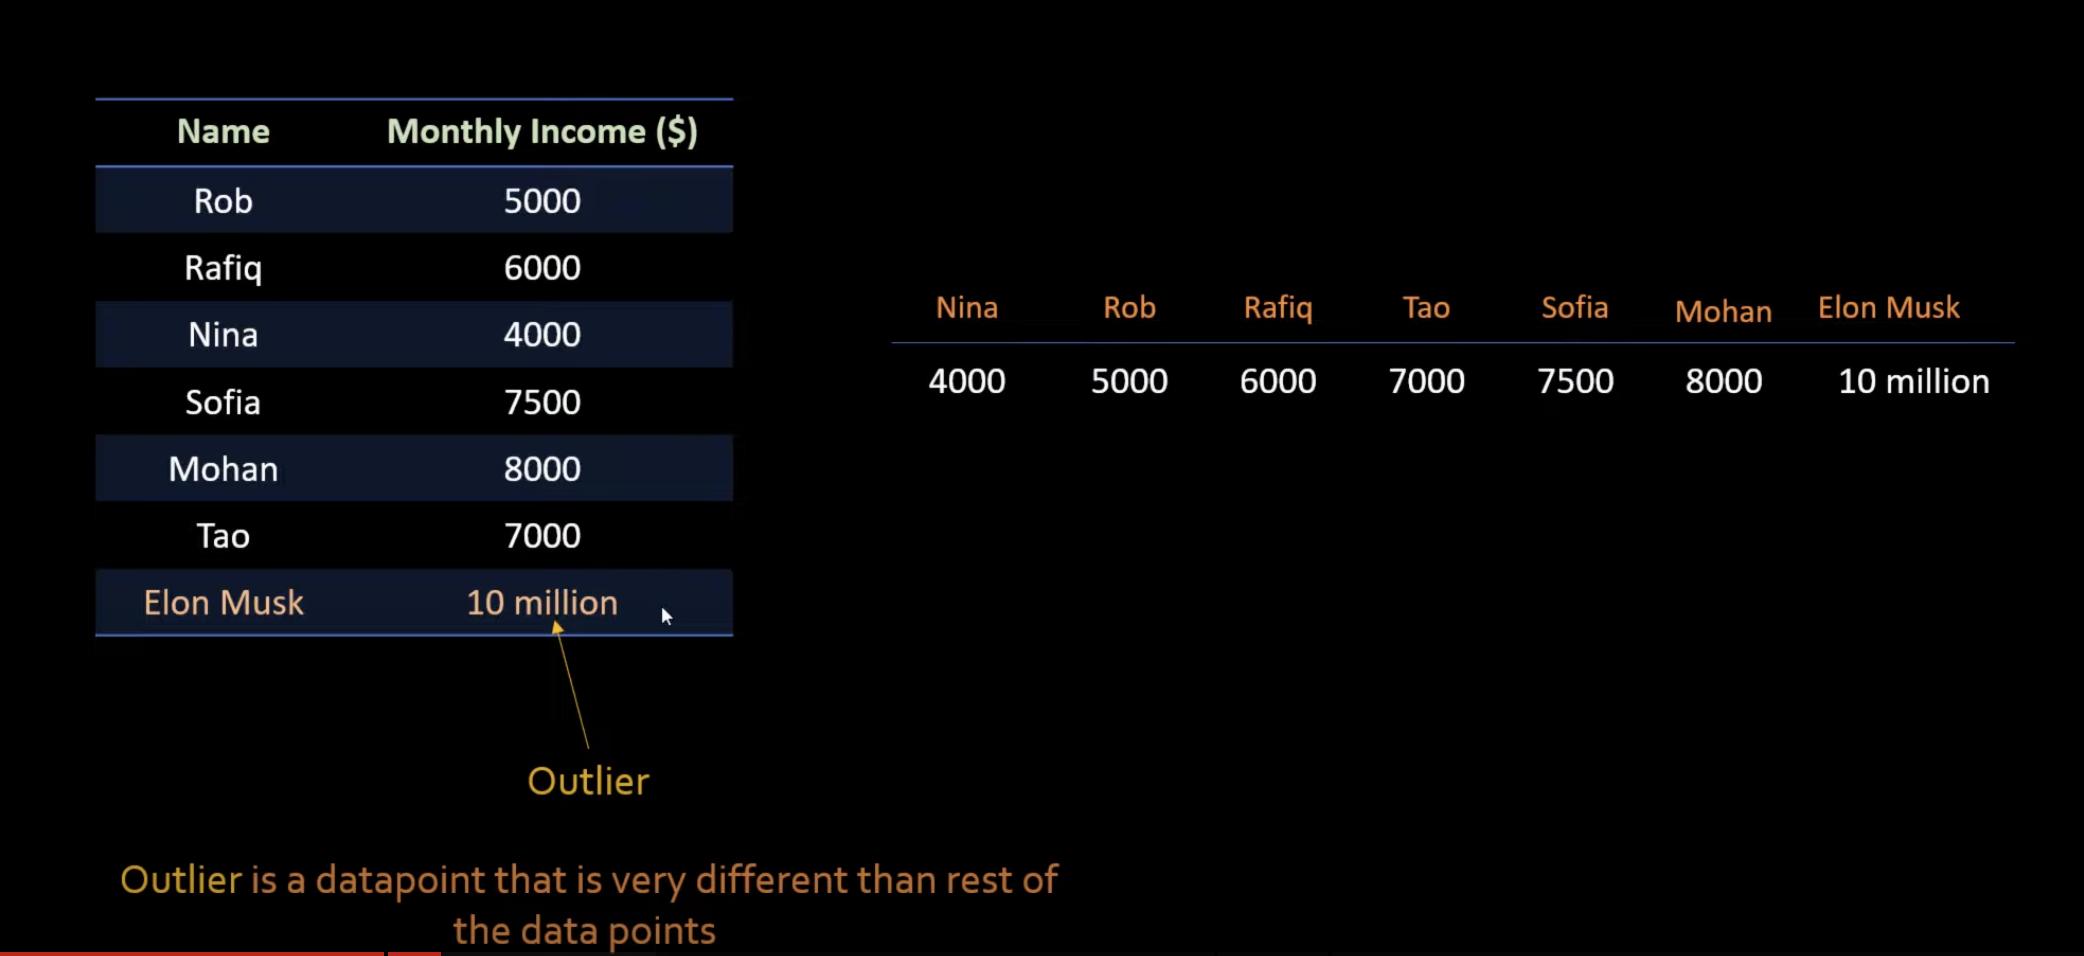

In [4]:
# outliers are the value that greater then 99% percentile -> above elon

In [5]:
# mode is maximum amount of values (max occurances)

In [6]:
import pandas as pd
df = pd.read_csv('data/income.csv')
df

company  revenue
0         Tesla      31.0
1           UBER     11.0
2         Amazon    386.0
3  Jindal  Steel      4.7
4      Axis Bank      5.6
5        Vedanta     11.3

In [7]:
df.describe()

revenue
count    6.000000
mean    74.933333
std    152.688646
min      4.700000
25%      6.950000
50%     11.150000
75%     26.075000
max    386.000000

In [8]:
df_no_outlier = df[df.revenue<df.revenue.quantile(0.99)]
df_no_outlier

company  revenue
0         Tesla      31.0
1           UBER     11.0
3  Jindal  Steel      4.7
4      Axis Bank      5.6
5        Vedanta     11.3

In [9]:
import numpy as np
df['revenue'][3]= np.NaN

/var/folders/bt/yzv722jd4ln6fj7873tf5mn00000gn/T/ipykernel_5917/3742551979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'][3]= np.NaN


In [10]:
df

company  revenue
0         Tesla      31.0
1           UBER     11.0
2         Amazon    386.0
3  Jindal  Steel      NaN
4      Axis Bank      5.6
5        Vedanta     11.3

In [11]:
df_new = df.fillna(df.revenue.median())
df_new

company  revenue
0         Tesla      31.0
1           UBER     11.0
2         Amazon    386.0
3  Jindal  Steel     11.3
4      Axis Bank      5.6
5        Vedanta     11.3

 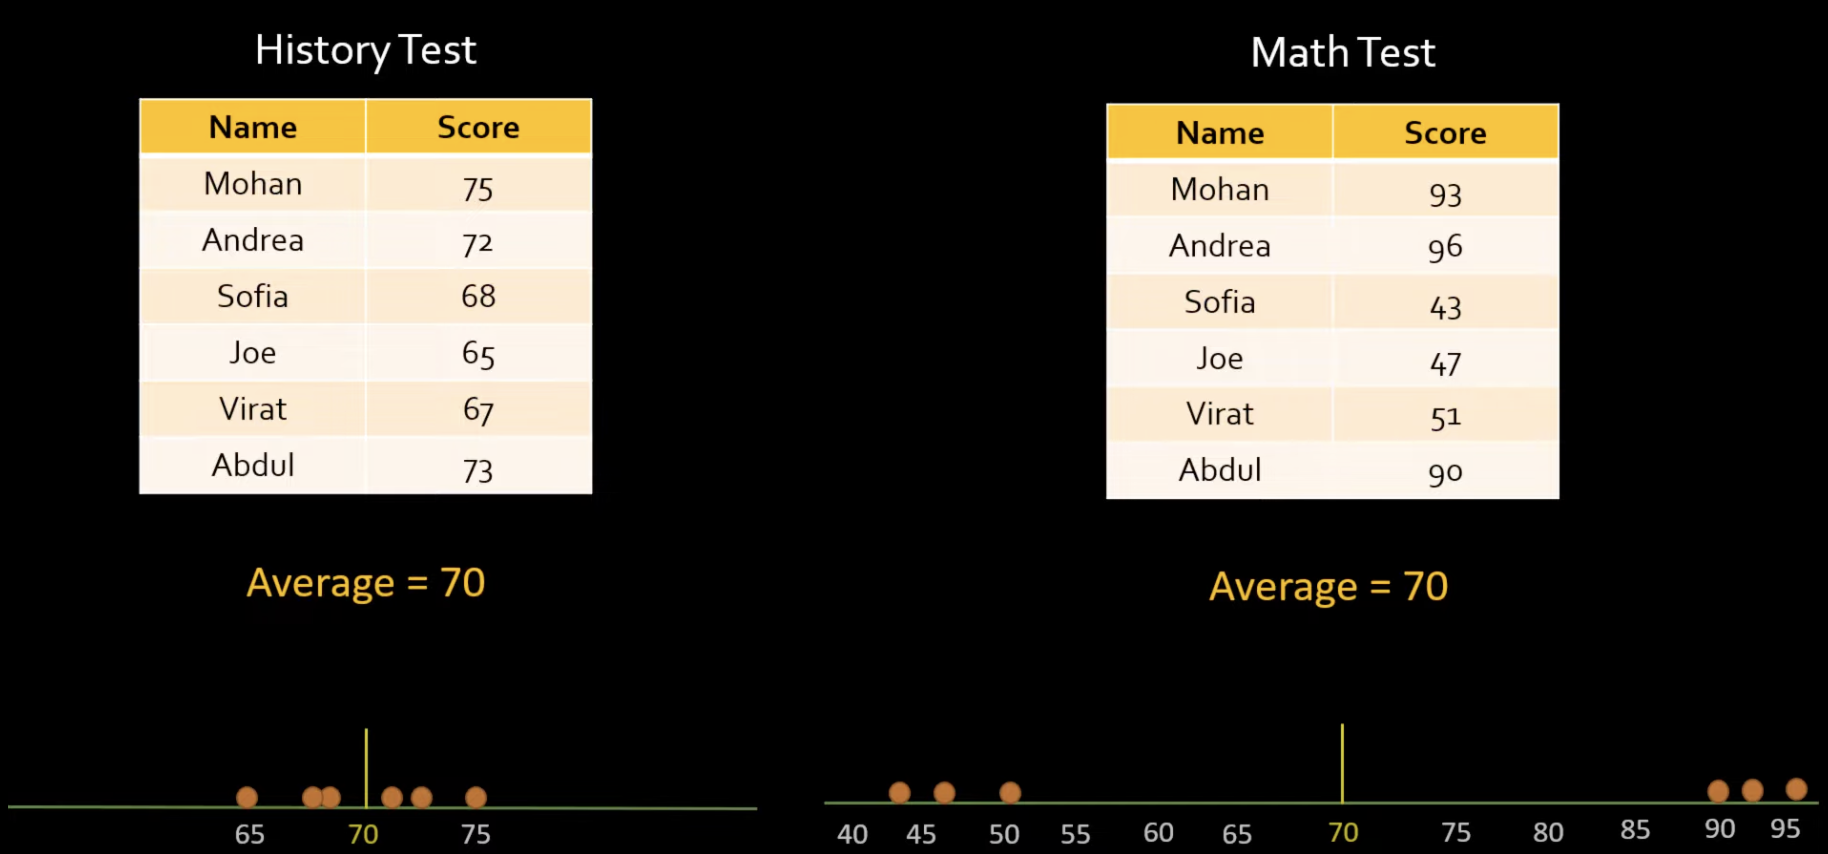

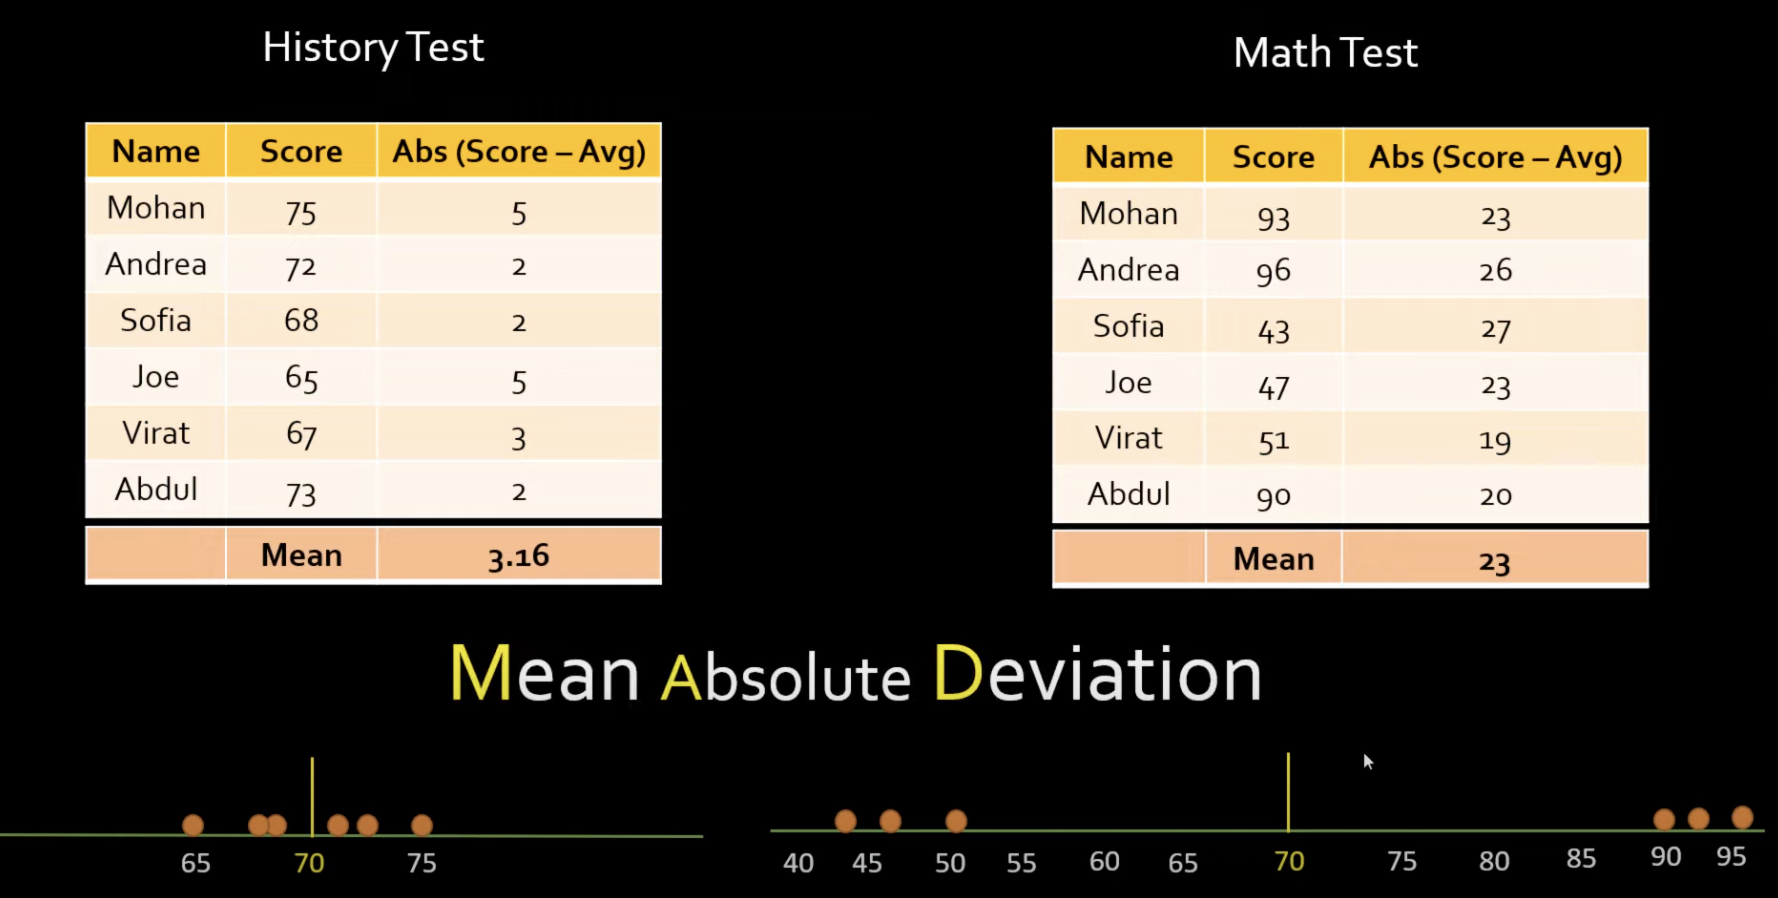

In [12]:
# in here we can see data is distributed from mean

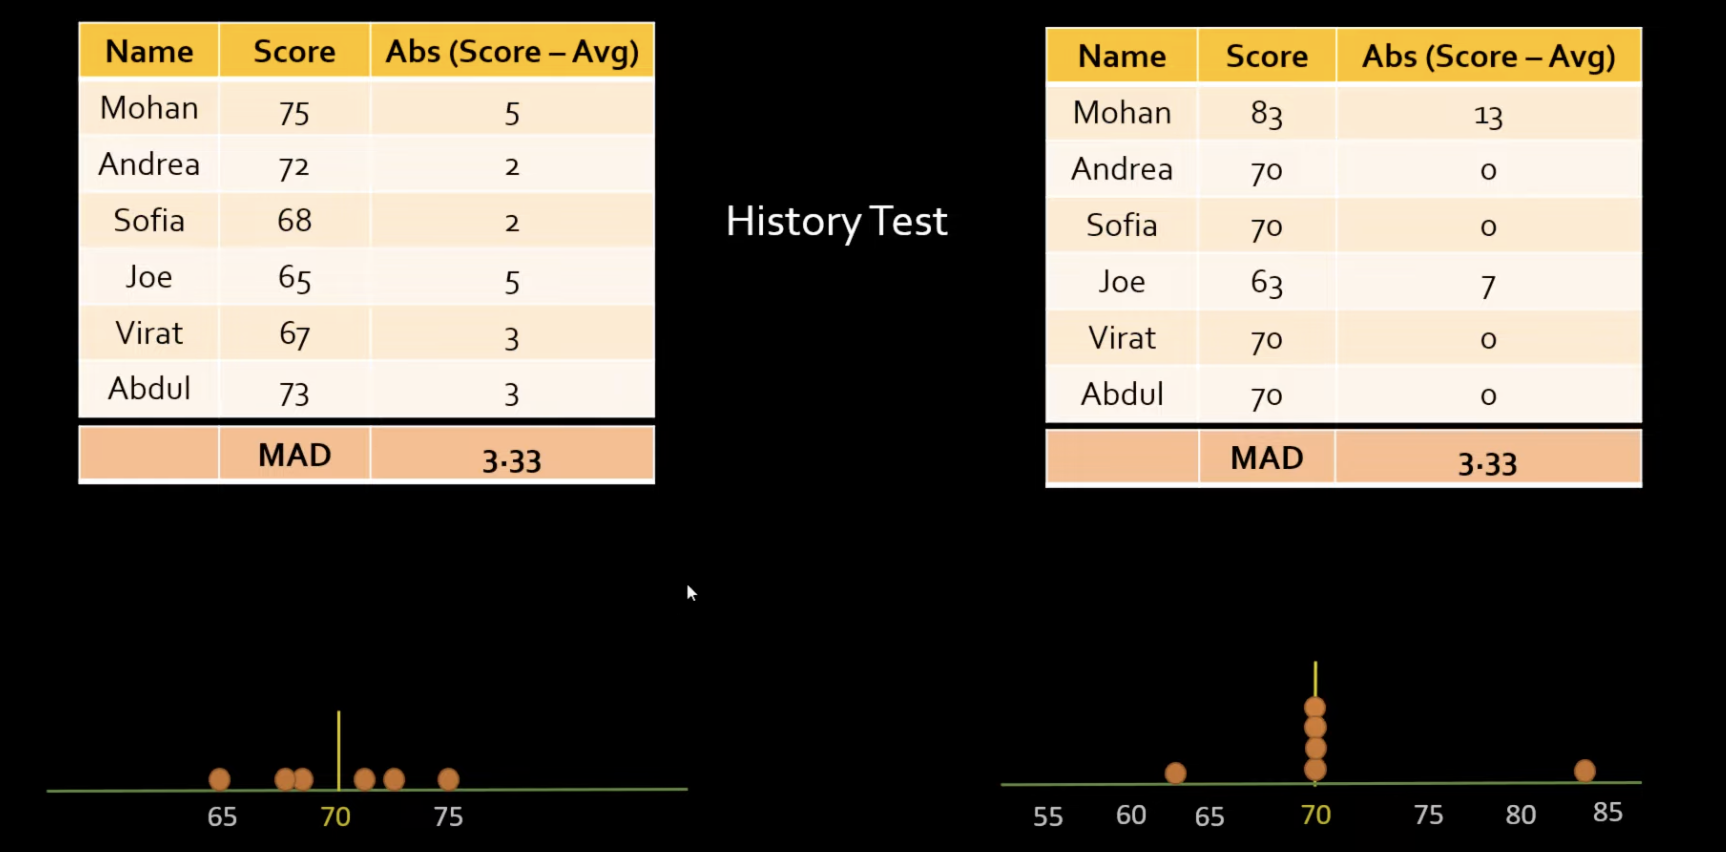

In [13]:
# in here you can see in second one we have far away data so mad is not useful here

 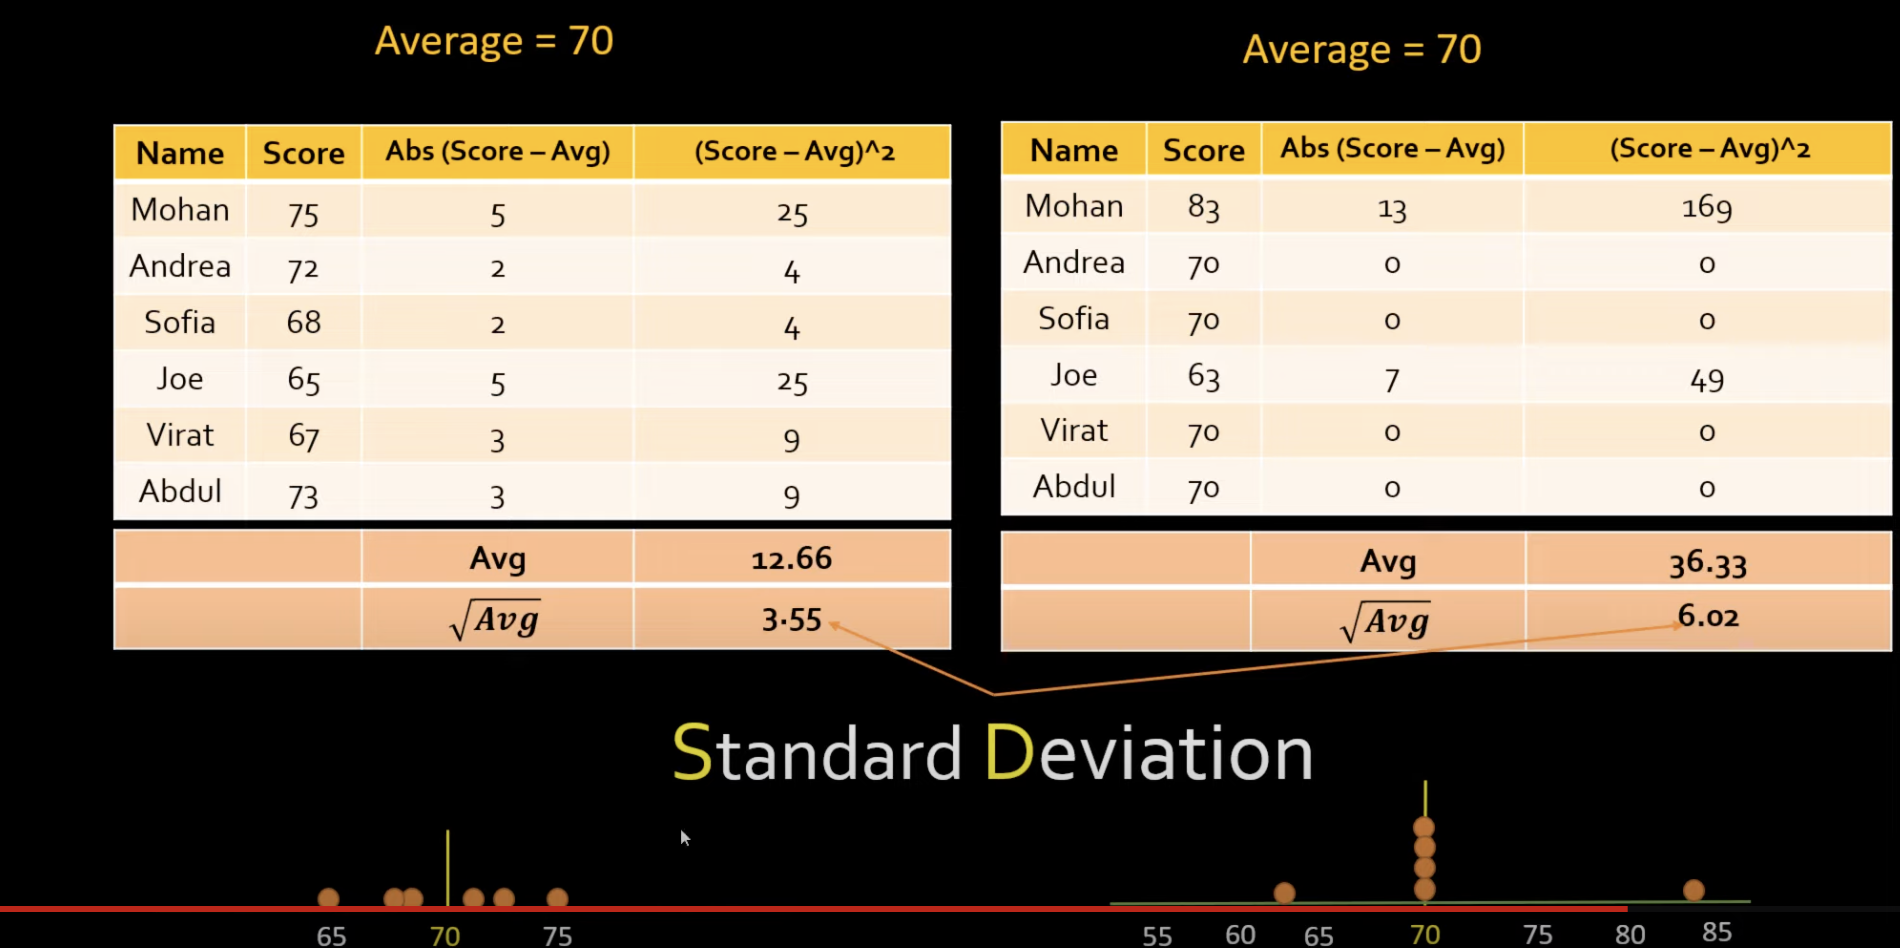

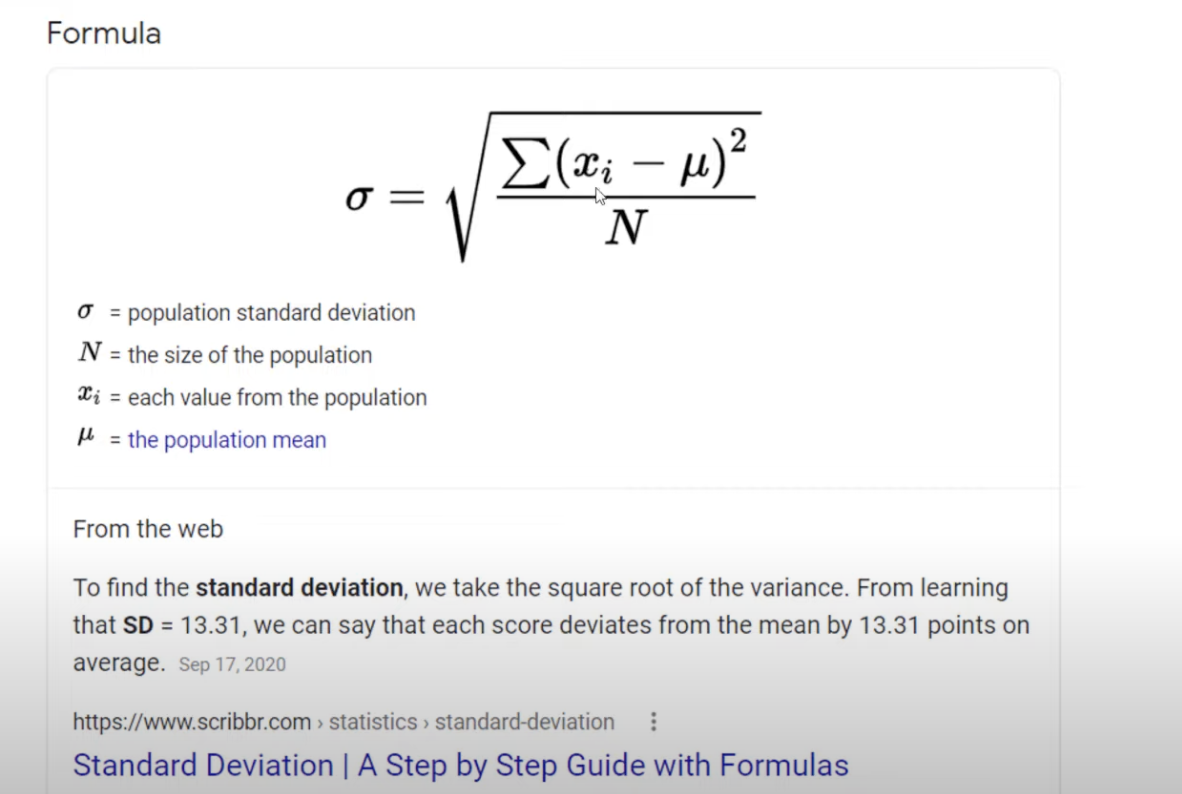

#### Normal distribution is used in data cleaning and outlier removal

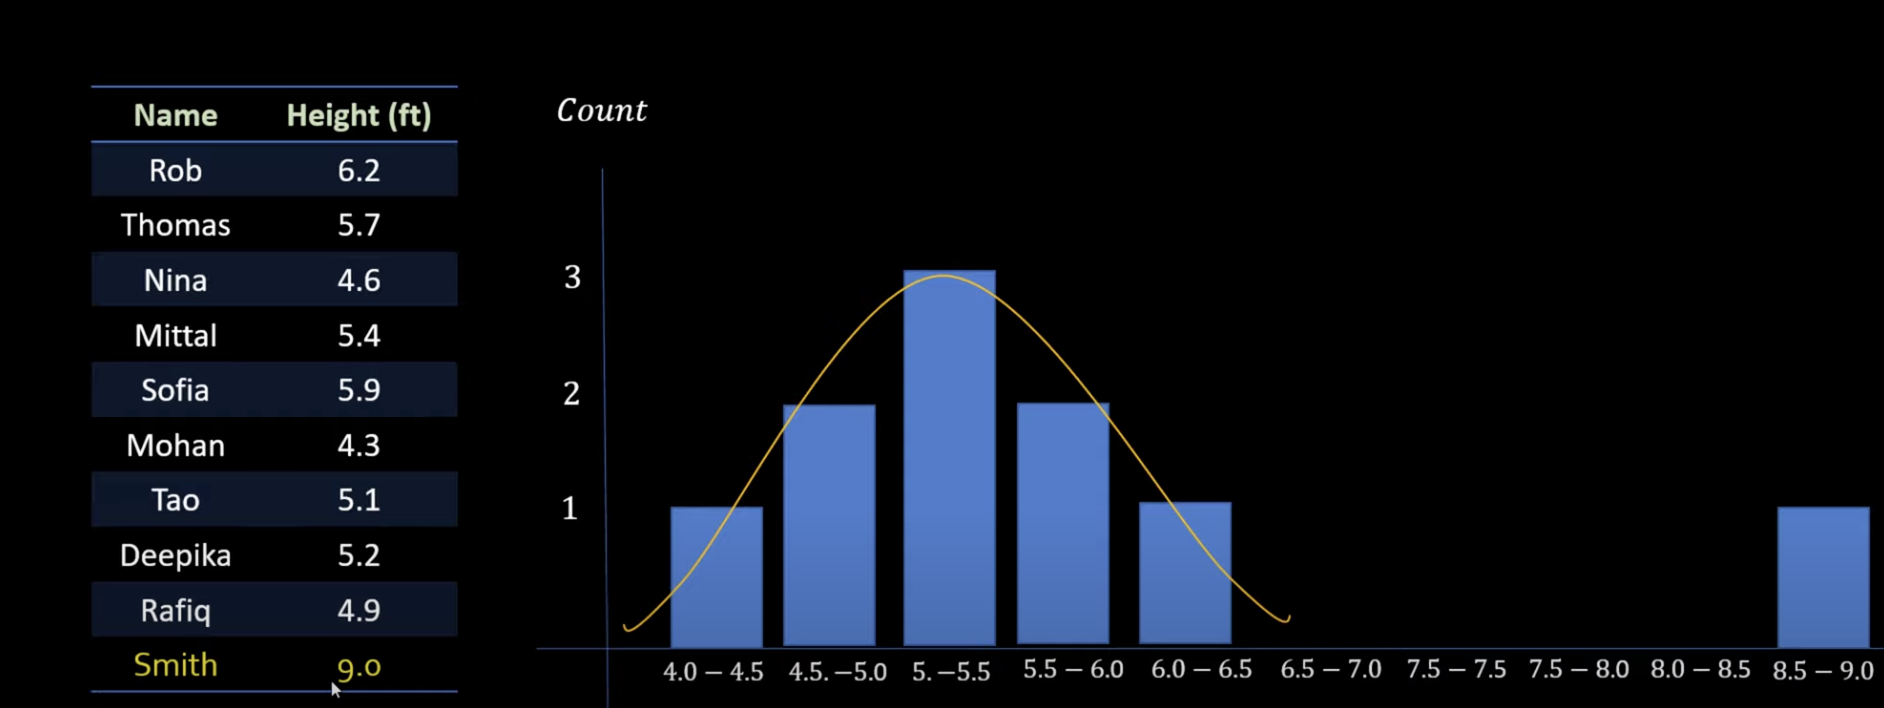

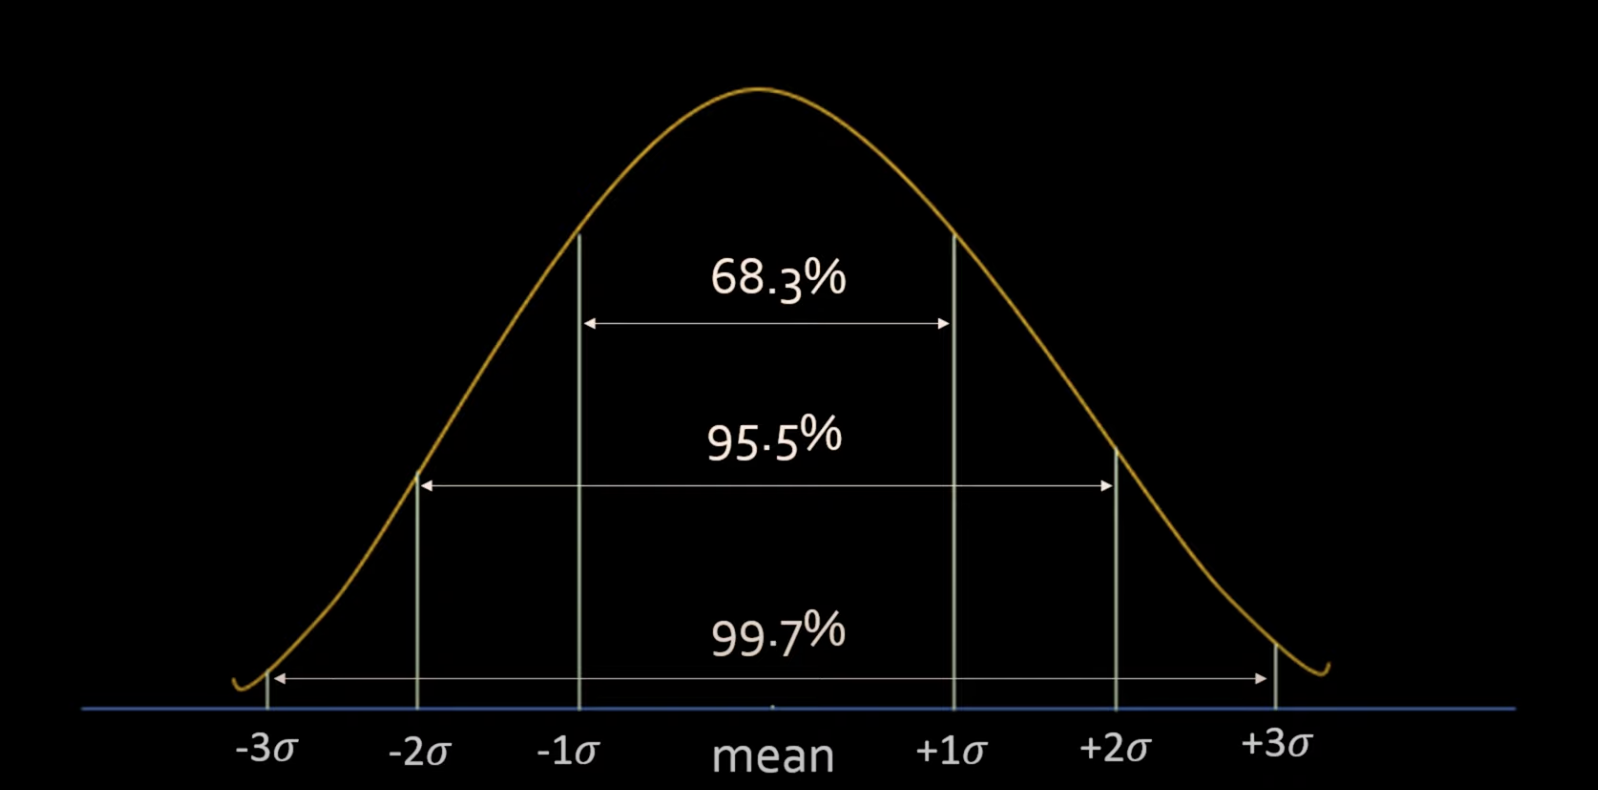

### How to use Standard deviation to remove outliers

In [14]:
import pandas as pd
df = pd.read_csv('data/heights.csv')
df.head()

gender     height
0   Male  73.847017
1   Male  68.781904
2   Male  74.110105
3   Male  71.730978
4   Male  69.881796

In [15]:
df.describe()

height
count  10000.000000
mean      66.367560
std        3.847528
min       54.263133
25%       63.505620
50%       66.318070
75%       69.174262
max       78.998742

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='height', ylabel='Count'>

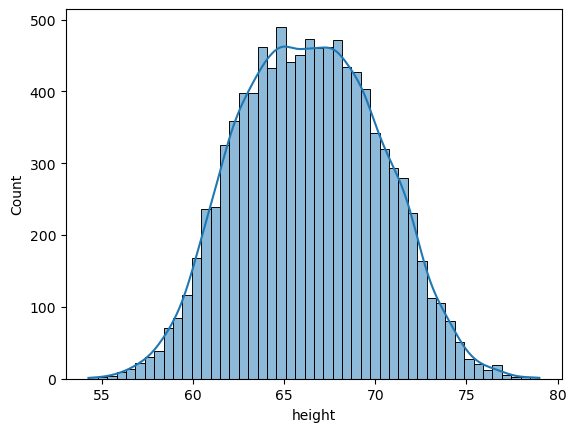

In [17]:
sns.histplot(df.height, kde=True)

In [18]:
mean = df.height.mean()
std_deviation = df.height.std()

In [19]:
min_outlier = mean - 3*std_deviation
max_outlier = mean + 3*std_deviation
print(min_outlier)
print(max_outlier)


54.824975392478876
77.91014411725232


In [20]:
df_no_outlier = df[(df.height>min_outlier)&(df.height<max_outlier)]
df_no_outlier

gender     height
0       Male  73.847017
1       Male  68.781904
2       Male  74.110105
3       Male  71.730978
4       Male  69.881796
...      ...        ...
9995  Female  66.172652
9996  Female  67.067155
9997  Female  63.867992
9998  Female  69.034243
9999  Female  61.944246

[9993 rows x 2 columns]

In [21]:
df[(df.height<min_outlier)|(df.height>max_outlier)]

gender     height
994     Male  78.095867
1317    Male  78.462053
2014    Male  78.998742
3285    Male  78.528210
3757    Male  78.621374
6624  Female  54.616858
9285  Female  54.263133

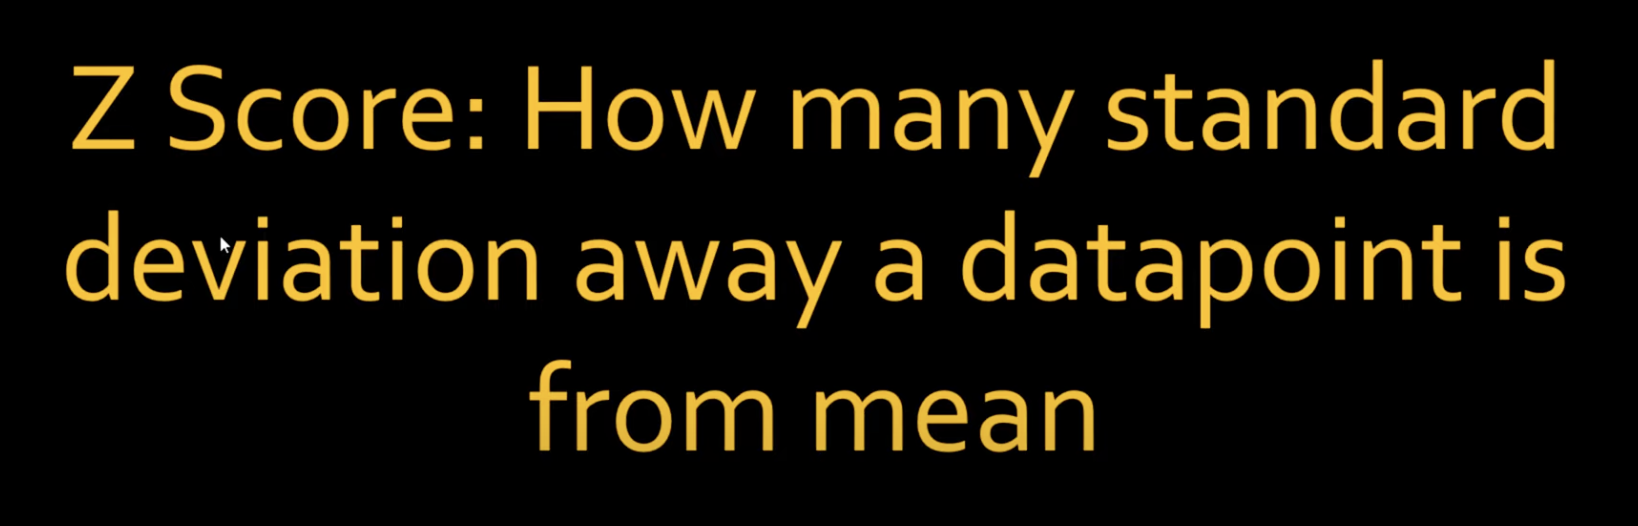

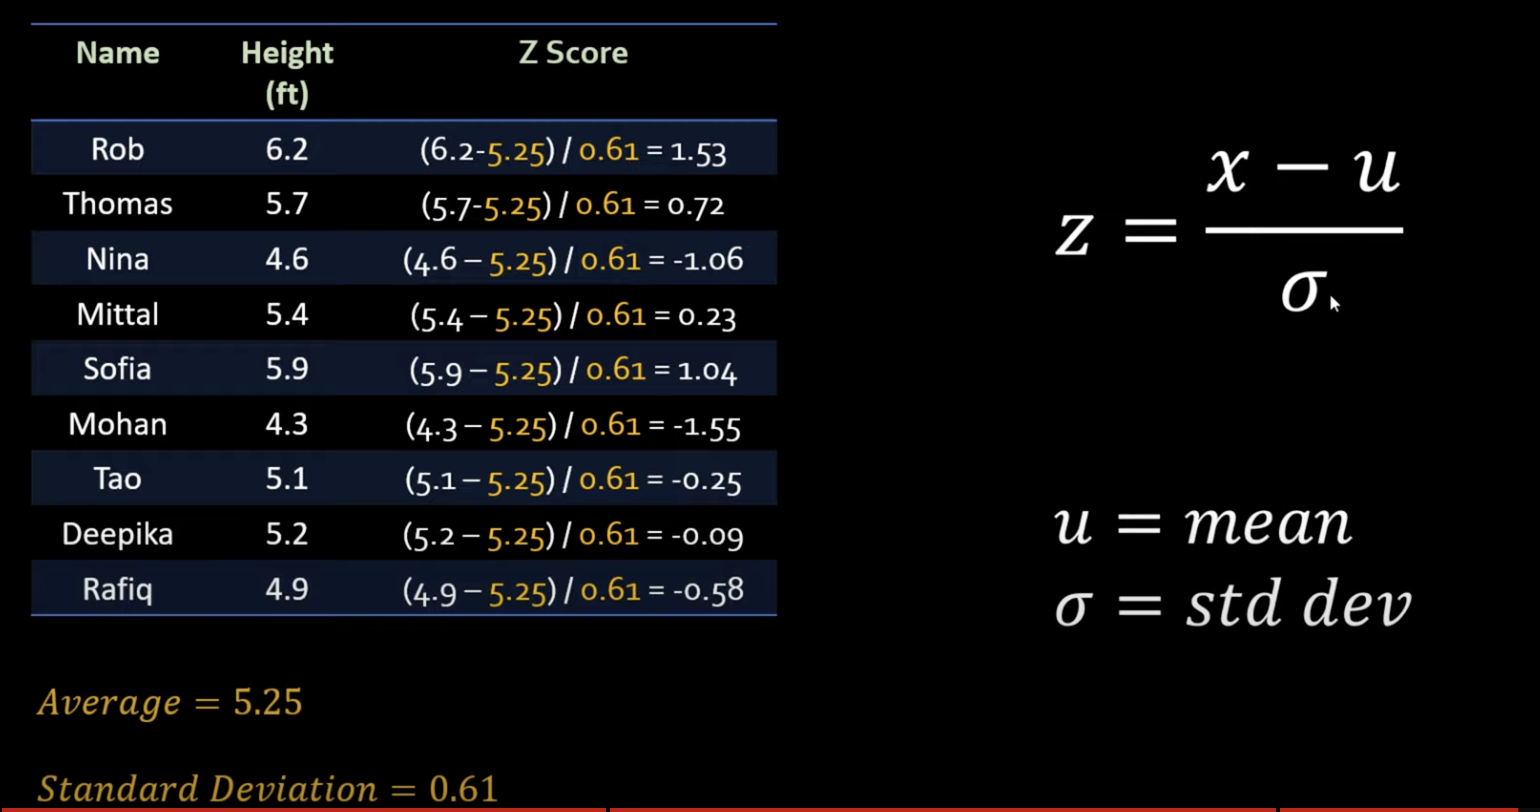

In [22]:
df['Z-Score'] = (df.height-df.height.mean())/df.height.std()
df.head()

gender     height   Z-Score
0   Male  73.847017  1.943964
1   Male  68.781904  0.627505
2   Male  74.110105  2.012343
3   Male  71.730978  1.393991
4   Male  69.881796  0.913375